## Hacemos un análisis previo de una muestra de los datos. Después lo pasaremos al cluster

#### Es mejor comprimir los ficheros en bz2 que en gz, ya que bz2 es splitable

In [1]:
%ls /home/dsc/Data/spark/

coupon150720.csv  sales_segments.csv.gz  transm150720.csv


In [2]:
import gzip

In [3]:
f = gzip.GzipFile('/home/dsc/Data/spark/sales_segments.csv.gz')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(f)

In [6]:
df.head()

,rloc^departure_date_seg^booking_date^freq_flyer_flag^creator_office_id^creator_iata_number^creator_gds_code^creator_city_code^creator_lat^creator_lon^creator_country_code^creator_continent_code^creator_channel_code^booking_status_code^cabin_code^booking_class_code^pos_office_id^pos_iata_number^pos_gds_code^pos_city_code^pos_lat^pos_lon^pos_country_code^pos_continent_code^pos_channel_code^board_point_seg^board_lat^board_lon^board_country_code^board_continent_code^off_point_seg^off_lat^off_lon^off_country_code^off_continent_code^num_legs^distance_seg^route^network^airline_code^flight_number^flight_type^revenue_source^estimated_flag^usage_board_point_seg^usage_off_point_seg^usage_flight_number^usage_date^non_currency_type^bookings_seg^rpk_seg^revenue_amount_seg^currency_code^fuel_surcharge_amount_seg^fuel_surcharge_currency_code^emd_count^emd_amount^emd_currency_code^total_outliers
0,59GS9Y^2013-12-21^2013-09-05^false^RUNHS3103^6...
1,4D87YU^2013-12-29^2013-01-29^false^RUNUU000B^6...
2,7W67K8^2013-12-29^2013-02-05^false^RUNUU01A3^6...
3,3ESPWM^2013-12-29^2013-03-19^false^RUNUU010C^6...
4,6ITPJM^2013-12-29^2013-05-11^false^MRSA12108^2...


In [7]:
df = pd.read_csv(f, sep = '^')

ValueError: No columns to parse from file

In [8]:
f = gzip.GzipFile('/home/dsc/Data/spark/sales_segments.csv.gz')

In [9]:
df = pd.read_csv(f, sep = '^')

/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (40,44,45,47,48,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df.head()

,rloc,departure_date_seg,booking_date,freq_flyer_flag,creator_office_id,creator_iata_number,creator_gds_code,creator_city_code,creator_lat,creator_lon,...,bookings_seg,rpk_seg,revenue_amount_seg,currency_code,fuel_surcharge_amount_seg,fuel_surcharge_currency_code,emd_count,emd_amount,emd_currency_code,total_outliers
0,59GS9Y,2013-12-21,2013-09-05,False,RUNHS3103,66200201,1A,RUN,-20.90083,55.53715,...,1,239,33.56,EUR,7.30,EUR,0,0,NaN,7.300000
1,4D87YU,2013-12-29,2013-01-29,False,RUNUU000B,66490104,UU,RUN,-20.90083,55.53715,...,5,1116,306.00,EUR,127.50,EUR,0,0,NaN,77.271017
2,7W67K8,2013-12-29,2013-02-05,False,RUNUU01A3,66490830,UU,RUN,-20.90083,55.53715,...,19,4240,1365.50,EUR,234.00,EUR,0,0,NaN,278.175661
3,3ESPWM,2013-12-29,2013-03-19,False,RUNUU010C,66490771,UU,RUN,-20.90083,55.53715,...,3,1220,81.35,EUR,39.93,EUR,0,0,NaN,32.458243
4,6ITPJM,2013-12-29,2013-05-11,False,MRSA12108,20261721,1A,MRS,43.29695,5.38107,...,2,1342,0.00,EUR,31.82,EUR,0,0,NaN,32.496507


In [11]:
df.count()

rloc                            1459121
departure_date_seg              1459121
booking_date                    1459121
freq_flyer_flag                 1459121
creator_office_id               1459121
creator_iata_number             1414716
creator_gds_code                1459121
creator_city_code               1459121
creator_lat                     1459121
creator_lon                     1459121
creator_country_code            1459103
creator_continent_code          1459121
creator_channel_code            1454248
booking_status_code             1458491
cabin_code                      1459121
booking_class_code              1459121
pos_office_id                   1455702
pos_iata_number                 1455702
pos_gds_code                    1455702
pos_city_code                   1448816
pos_lat                         1448816
pos_lon                         1448816
pos_country_code                1448798
pos_continent_code              1448816
pos_channel_code                1455216


In [12]:
df.columns

Index([u'rloc', u'departure_date_seg', u'booking_date', u'freq_flyer_flag',
       u'creator_office_id', u'creator_iata_number', u'creator_gds_code',
       u'creator_city_code', u'creator_lat', u'creator_lon',
       u'creator_country_code', u'creator_continent_code',
       u'creator_channel_code', u'booking_status_code', u'cabin_code',
       u'booking_class_code', u'pos_office_id', u'pos_iata_number',
       u'pos_gds_code', u'pos_city_code', u'pos_lat', u'pos_lon',
       u'pos_country_code', u'pos_continent_code', u'pos_channel_code',
       u'board_point_seg', u'board_lat', u'board_lon', u'board_country_code',
       u'board_continent_code', u'off_point_seg', u'off_lat', u'off_lon',
       u'off_country_code', u'off_continent_code', u'num_legs',
       u'distance_seg', u'route', u'network', u'airline_code',
       u'flight_number', u'flight_type', u'revenue_source', u'estimated_flag',
       u'usage_board_point_seg', u'usage_off_point_seg',
       u'usage_flight_number', u'usage

In [14]:
df = df[['bookings_seg','revenue_amount_seg','fuel_surcharge_amount_seg']]

In [15]:
df.head()

,bookings_seg,revenue_amount_seg,fuel_surcharge_amount_seg
0,1,33.56,7.30
1,5,306.00,127.50
2,19,1365.50,234.00
3,3,81.35,39.93
4,2,0.00,31.82


In [ ]:
#Queremos descubrir cosas raras. Vamos a hacer clusters con kmeans y vamos a calcular un valor de desviación de cada elemento 
# del cluster. Vamos a designar outliers para aquellos cuya z > 3

In [16]:
df['revenue'] = df['revenue_amount_seg'] / df['bookings_seg']

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
df.head()

,bookings_seg,revenue_amount_seg,fuel_surcharge_amount_seg,revenue
0,1,33.56,7.30,33.560000
1,5,306.00,127.50,61.200000
2,19,1365.50,234.00,71.868421
3,3,81.35,39.93,27.116667
4,2,0.00,31.82,0.000000


In [18]:
df['tax'] = df['fuel_surcharge_amount_seg'] / df['bookings_seg']

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
simple = df[['revenue', 'tax']]

/usr/lib64/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


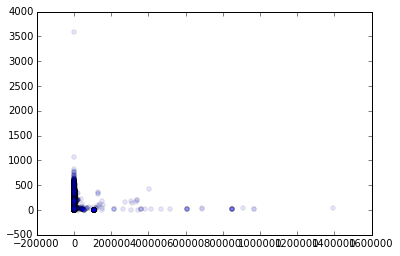

In [26]:
plt.scatter(simple['revenue'], simple['tax'], alpha = 0.1)
plt.show()

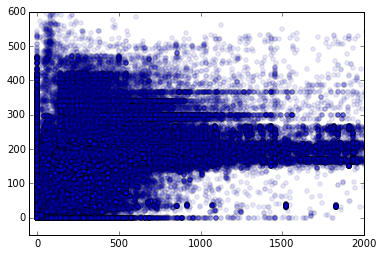

In [27]:
plt.scatter(simple['revenue'], simple['tax'], alpha = 0.1)
plt.xlim(-50, 2000)
plt.ylim(-50, 600)

plt.show()

In [29]:
smaller = simple.sample(10000)

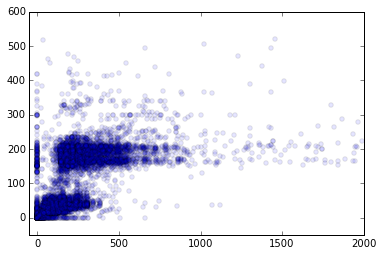

In [30]:
plt.scatter(smaller['revenue'], smaller['tax'], alpha = 0.1)
plt.xlim(-50, 2000)
plt.ylim(-50, 600)

plt.show()

In [ ]:
#Se ve que hay cierto agrupamiento de los datos. Vamos a agrupar con kmeans

In [33]:
from sklearn.cluster import KMeans
import numpy as np

In [35]:
kmeans = KMeans(n_clusters=10)

In [37]:
clusters = kmeans.fit_predict(smaller)

In [38]:
clusters #saca un array en el que indica el cluster en el que cae cada punto de smaller

array([6, 1, 0, ..., 1, 8, 7], dtype=int32)

In [39]:
smaller.iloc[0] #el punto x = 170... y = 123...cae en el cluster 6

revenue    170.3525
tax        123.1950
Name: 664624, dtype: float64

In [ ]:
# ahora sacamos el zvalue?

In [40]:
smaller['cluster'] = clusters

In [41]:
smaller.head()

,revenue,tax,cluster
664624,170.3525,123.195,6
826260,603.5000,199.090,1
1236635,55.9900,12.960,0
1341330,194.0000,29.370,3
1312282,494.3800,180.070,1


In [43]:
groups = smaller.groupby(['cluster'])

In [45]:
means = groups.mean()

In [48]:
means

,revenue,tax
cluster,,
0,41.931479,21.877173
1,472.562586,189.831706
2,1959.474574,208.050426
3,253.283493,43.112079
4,741.110345,208.240282
5,8369.950000,195.020000
6,168.988961,188.716394
7,119.567723,33.768702
8,298.224170,188.449175


In [46]:
stdevs = groups.std()

In [47]:
stdevs

,revenue,tax
cluster,,
0,24.033167,27.332797
1,58.911496,45.406140
2,407.876854,64.201767
3,44.747772,18.746357
4,93.015371,59.236726
5,NaN,NaN
6,48.804920,43.000358
7,28.550289,18.032548
8,42.375316,37.844899


In [51]:
stdevs = stdevs.fillna(0.00001)

In [52]:
stdevs

,revenue,tax
cluster,,
0,24.033167,27.332797
1,58.911496,45.406140
2,407.876854,64.201767
3,44.747772,18.746357
4,93.015371,59.236726
5,0.000010,0.000010
6,48.804920,43.000358
7,28.550289,18.032548
8,42.375316,37.844899


In [53]:
means.columns = means.columns.map(lambda s: s + "_mean")

In [54]:
stdevs.columns = stdevs.columns.map(lambda s: s + '_stdev')

In [55]:
clusters_stats = pd.merge(means, stdevs, left_index=True, right_index=True)

In [56]:
clusters_stats

,revenue_mean,tax_mean,revenue_stdev,tax_stdev
cluster,,,,
0,41.931479,21.877173,24.033167,27.332797
1,472.562586,189.831706,58.911496,45.406140
2,1959.474574,208.050426,407.876854,64.201767
3,253.283493,43.112079,44.747772,18.746357
4,741.110345,208.240282,93.015371,59.236726
5,8369.950000,195.020000,0.000010,0.000010
6,168.988961,188.716394,48.804920,43.000358
7,119.567723,33.768702,28.550289,18.032548
8,298.224170,188.449175,42.375316,37.844899


In [61]:
clusters_stats = clusters_stats.reset_index()

In [62]:
merged = pd.merge(smaller, clusters_stats, left_on='cluster', right_on='cluster')

In [64]:
merged.head()

,revenue,tax,cluster,revenue_mean,tax_mean,revenue_stdev,tax_stdev
0,170.3525,123.195000,6,168.988961,188.716394,48.80492,43.000358
1,123.8900,230.220000,6,168.988961,188.716394,48.80492,43.000358
2,163.9900,226.510000,6,168.988961,188.716394,48.80492,43.000358
3,202.3600,119.393333,6,168.988961,188.716394,48.80492,43.000358
4,177.6000,180.050000,6,168.988961,188.716394,48.80492,43.000358


In [ ]:
#merged['z_rev'] = (merged['revenue'] - merged['revenue_mean']) / merged['revenue_stdev']

In [79]:
from math import sqrt
def is_outlier(row):
    
    z_rev = (row['revenue'] - row['revenue_mean']) / row['revenue_stdev']
    z_tax = (row['tax'] - row['tax_mean']) / row['tax_stdev']
    z = sqrt(z_rev**2 + z_tax**2)
    
    return z > 3
outlier = merged.apply(is_outlier, axis = 1)

In [80]:
outlier.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [81]:
outlier.sum()

359

In [82]:
merged['outlier'] = outlier

In [83]:
merged.head()

,revenue,tax,cluster,revenue_mean,tax_mean,revenue_stdev,tax_stdev,outlier
0,170.3525,123.195000,6,168.988961,188.716394,48.80492,43.000358,False
1,123.8900,230.220000,6,168.988961,188.716394,48.80492,43.000358,False
2,163.9900,226.510000,6,168.988961,188.716394,48.80492,43.000358,False
3,202.3600,119.393333,6,168.988961,188.716394,48.80492,43.000358,False
4,177.6000,180.050000,6,168.988961,188.716394,48.80492,43.000358,False


In [85]:
simple_outliers = merged[['revenue', 'tax', 'outlier']]

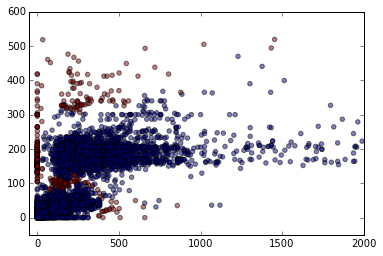

In [88]:
plt.scatter(simple_outliers['revenue'], \
            simple_outliers['tax'], \
            c=simple_outliers['outlier'], \
            alpha = 0.5)
plt.xlim(-50, 2000)
plt.ylim(-50, 600)

plt.show()